<a href="https://colab.research.google.com/github/Vitalyastiy/cheat-python/blob/main/viz/%D0%9F%D0%B0%D0%BD%D0%B4%D0%B0%D1%81-%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pythonist.ru/kak-sozdavat-naglyadnye-grafiki-v-python-bystro-krasivo-i-ochen-krasivo/amp/

In [9]:
# загружаем данные
import pandas as pd
import plotly
import numpy as np
import seaborn as sns
import plotly.express
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FBosler/AdvancedPlotting/master/combined_set.csv')
# присваиваем метки каждому году
data['Mean Log GDP per capita']  = data.groupby('Year')['Log GDP per capita'].transform(
    pd.qcut,
    q=5,
    labels=(['Lowest','Low','Medium','High','Highest'])
)

<Axes: ylabel='Frequency'>

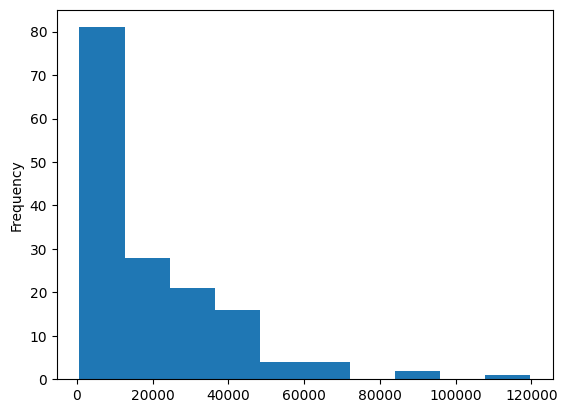

In [3]:
np.exp(data[data['Year']==2018]['Log GDP per capita']).plot( #значение 'Log GDP per capita' представляет логарифм натуральный от GDP per capita. Вычисление экспоненты от значения 'Log GDP per capita' приводит к восстановлению исходного значения GDP per capita, которое уже не будет находиться на логарифмической шкале. Таким образом, построение гистограммы распределения экспоненты значения 'Log GDP per capita' позволяет оценить распределение исходных значений GDP per capita.
    kind='hist'
)

kind: Pandas должна знать, какого типа график вы хотите строить.
 Возможны следующие варианты: hist, bar, barh, scatter, area, kde, line, box, hexbin, pie.

figsize: Позволяет переопределить значение размера, заданное по умолчанию (6 дюймов в ширину и 4 дюйма в высоту). Данный параметр принимает на вход кортеж, например figsize=(12,8), что я часто использую.

title: Добавляет к графику заголовок. Как правило, я его использую, чтобы кратко описать, что происходит на графике, дабы потом это можно было быстро понять. Данный параметр принимает на вход строку.

bins: Позволяет переопределить ширину областей гистограммы. Данный параметр принимает на вход список или подобную ему последовательность, например bins=np.arange(2,8,0.25).

xlim/ylim: Позволяет переопределить максимальные и минимальные значения осей x и y. Оба параметра принимают на вход кортежи, например xlim=(0,5).

Вертикальная гистограмма

In [6]:
data

,Year,Country name,ISO3,Continent,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Gapminder Life Expectancy,Gapminder Population,Mean Log GDP per capita
0,2007,Afghanistan,AFG,Asia,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,55.2,27300000.0,Lowest
1,2008,Afghanistan,AFG,Asia,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,55.2,27300000.0,Lowest
2,2009,Afghanistan,AFG,Asia,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,55.7,28000000.0,Lowest
3,2010,Afghanistan,AFG,Asia,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,56.2,28800000.0,Lowest
4,2011,Afghanistan,AFG,Asia,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,56.7,29700000.0,Lowest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,2014,Zimbabwe,ZWE,Africa,4.184451,7.562753,0.765839,52.380001,0.642034,-0.048634,0.820217,0.725214,0.239111,0.566209,-0.985267,-1.484067,57.0,15400000.0,Lowest
1892,2015,Zimbabwe,ZWE,Africa,3.703191,7.556052,0.735800,53.799999,0.667193,-0.097354,0.810457,0.715079,0.178861,0.590012,-0.893078,-1.357514,58.3,15800000.0,Lowest
1893,2016,Zimbabwe,ZWE,Africa,3.735400,7.538829,0.768425,54.400002,0.732971,-0.068105,0.723612,0.737636,0.208555,0.699344,-0.900649,-1.374650,59.3,16200000.0,Lowest
1894,2017,Zimbabwe,ZWE,Africa,3.638300,7.549491,0.754147,55.000000,0.752826,-0.069670,0.751208,0.806428,0.224051,0.682647,-0.988153,-1.350867,59.8,16500000.0,Lowest


<Axes: xlabel='Country name'>

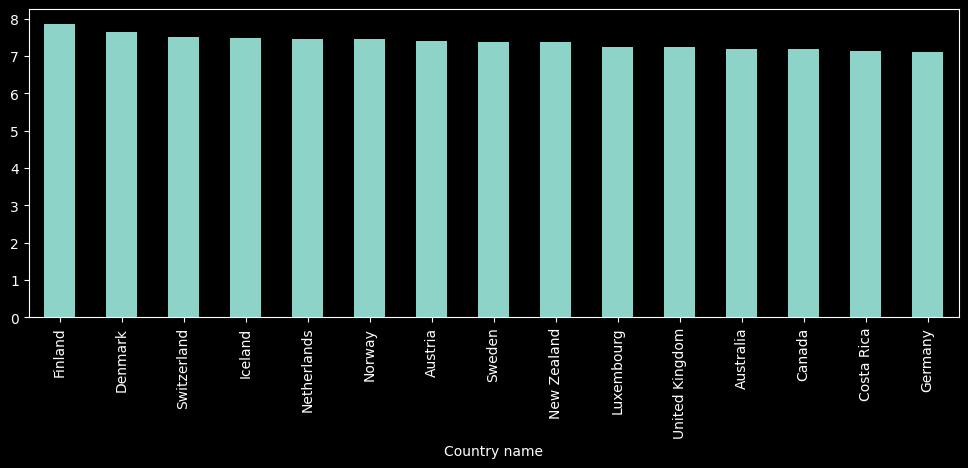

In [15]:
data[data['Year'] == 2018].set_index('Country name')['Life Ladder'].nlargest(15).plot(  #nsmallest - наименьшие значения
    kind='bar',
    figsize=(12,4)
)

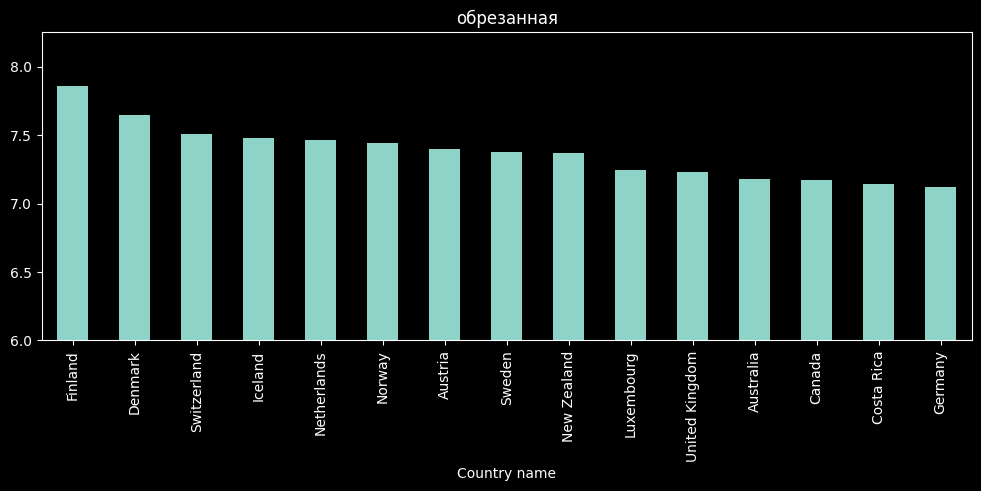

In [20]:
df = data[data['Year'] == 2018].set_index('Country name')['Life Ladder'].nlargest(15)

ax = df.plot(kind='bar', figsize=(12,4))
ax.set_ylim(6, ax.get_ylim()[1])
ax.set_title('обрезанная')
plt.show()

Горизонтальная гистограмма

<Axes: ylabel='Continent'>

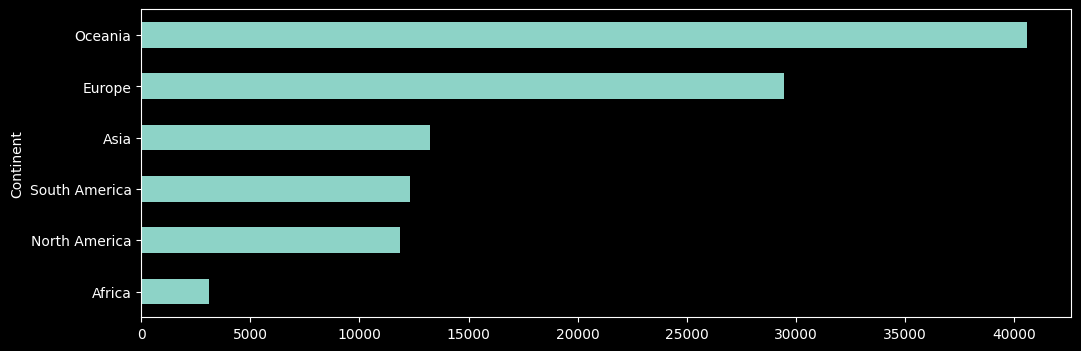

In [23]:
np.exp(data[
    data['Year'] == 2018
].groupby('Continent')['Log GDP per capita']\
       .mean()).sort_values().plot(
    kind='barh',
    figsize=(12,4)
)

Ящик с усами (Box plot)


<Axes: >

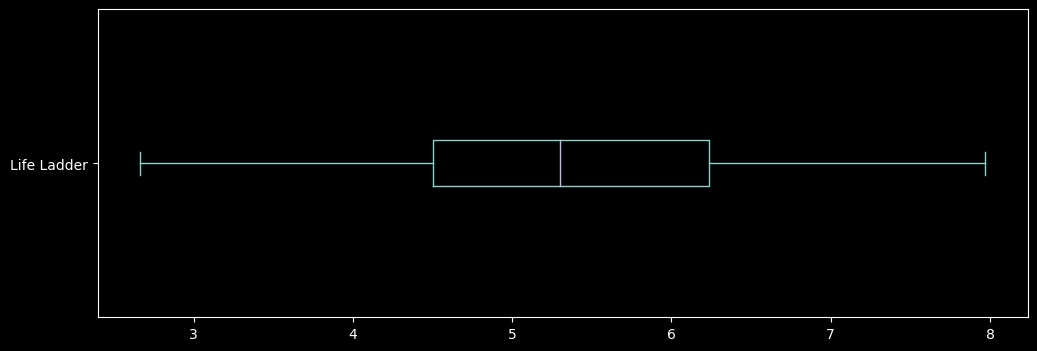

In [26]:
data['Life Ladder'].plot(
    kind='box',
    vert=False, #перевернуть боксплот
    figsize=(12,4))

Точечный график (диаграмма рассеяния)


<Axes: xlabel='Healthy life expectancy at birth', ylabel='Gapminder Life Expectancy'>

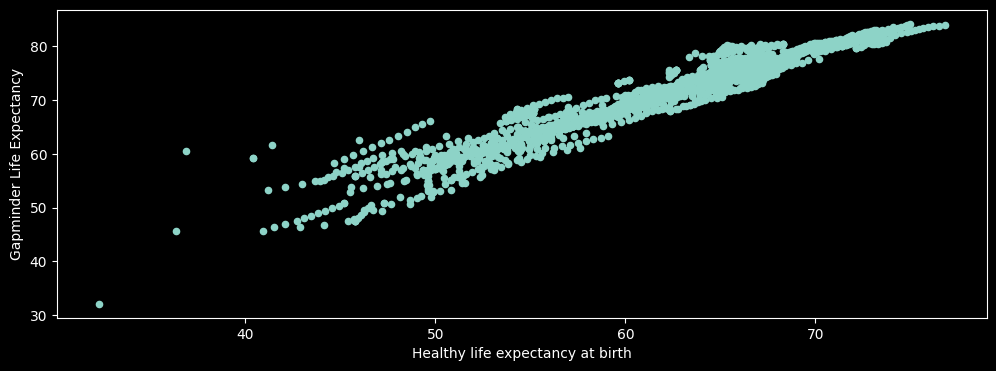

In [28]:
data[['Healthy life expectancy at birth','Gapminder Life Expectancy']].plot(
    kind='scatter',
    x='Healthy life expectancy at birth',
    y='Gapminder Life Expectancy',
    figsize=(12,4)
)

#Гексбиновая диаграмма

Чтение диаграммы hexbin осуществляется следующим образом:

1. Каждая шестиугольная ячейка представляет комбинацию значений переменных "Healthy life expectancy at birth" и "Generosity".
2. Цвет каждой ячейки указывает на количество точек данных, попавших в эту ячейку. Темнее цвет означает большее количество точек.
3. Вы можете анализировать плотность и распределение данных, исходя из количества ячеек определенного цвета.

Таким образом, диаграмма hexbin помогает визуализировать двумерное распределение данных и выявить возможные паттерны или взаимосвязи между переменными.

<Axes: xlabel='Healthy life expectancy at birth', ylabel='Generosity'>

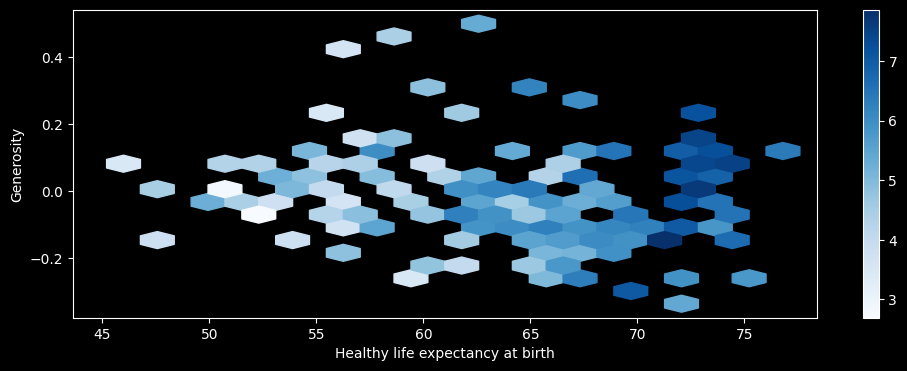

In [30]:
data[data['Year'] == 2018].plot(
    kind='hexbin',
    x='Healthy life expectancy at birth',
    y='Generosity',
    C='Life Ladder',
    gridsize=20,
    figsize=(12,4),
    cmap="Blues", # по умолчанию зеленый
    sharex=False # необходимо, чтобы не допустить ошибок
)

Круговая диаграмма


<Axes: ylabel='Gapminder Population'>

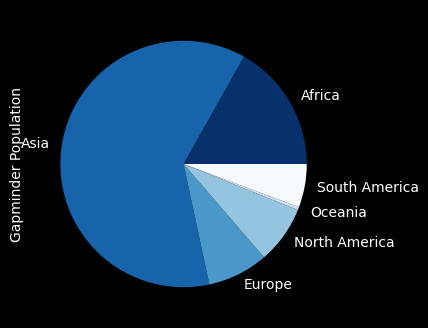

In [31]:
data[data['Year'] == 2018].groupby(
    ['Continent']
)['Gapminder Population'].sum().plot(
    kind='pie',
    figsize=(12,4),
    cmap="Blues_r", # по умолчанию оранжевый
)
#2018: Круговая диаграмма показывает количество жителей планеты с разбивкой по континентам.

Диаграмма с накоплением


<Axes: xlabel='Year'>

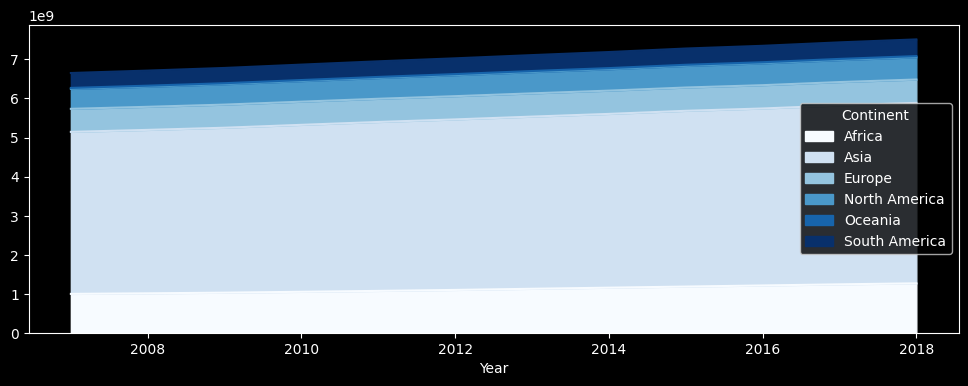

In [33]:
data.groupby(
    ['Year','Continent']
)['Gapminder Population'].sum().unstack().plot(
    kind='area',
    figsize=(12,4),
    cmap="Blues", # по умолчанию оранжевый
)
#Количество жителей планеты растет.

Линейный график


<Axes: xlabel='Year'>

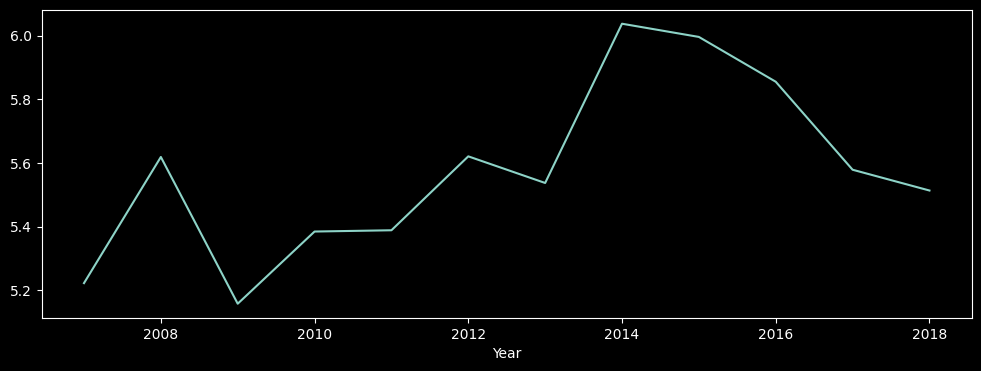

In [42]:
data[
    data['Country name'] == 'Russia'
].set_index('Year')['Life Ladder'].plot(
    kind='line',
    figsize=(12,4)
)
#Динамика счастья в Russia.